Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [49]:
# imports
import requests
import os
import pandas as pd
import json  
import matplotlib.pyplot as plt
import sqlite3

In [ ]:
# Join Data
bike_stations_toronto = pd.read_csv(r'C:\Users\akans\Documents\Kierans_Documents\LHL\Statistical-Modelling-Project\data\bike_stations_toronto.csv')
results_four = pd.read_csv(r'C:\Users\akans\Documents\Kierans_Documents\LHL\Statistical-Modelling-Project\data\results_four.csv')
bike_stations_toronto = pd.DataFrame(bike_stations_toronto)
results_four = pd.DataFrame(results_four)

bike_stations_and_places = pd.merge(bike_stations_toronto, results_four, on=['latitude', 'longitude'], how='inner')

In [23]:
# Drop columns
bike_stations_and_places.columns
bike_stations_and_places_2 = bike_stations_and_places.drop(columns=['longitude', 'latitude', 'Unnamed: 0', 'name', 'api'])
bike_stations_and_places_2

,free_bikes,distance,query
0,13,194,bar
1,13,842,bar
2,13,804,bar
3,13,617,bar
4,13,824,bar
...,...,...,...
12764,0,593,restaurant
12765,0,605,restaurant
12766,0,728,restaurant
12767,0,736,restaurant


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [55]:
# filter data by query and keep quantitative values
bike_stations_and_places_bar_quant_d = bike_stations_and_places_2[bike_stations_and_places_2['query'] == 'bar']
bike_stations_and_places_art_quant_d = bike_stations_and_places_2[bike_stations_and_places_2['query'] == 'art']
bike_stations_and_places_restaurant_quant_d = bike_stations_and_places_2[bike_stations_and_places_2['query'] == 'restaurant']
bike_stations_and_places_bar_quant_df = bike_stations_and_places_bar_quant_d.drop(columns='query')
bike_stations_and_places_art_quant_df = bike_stations_and_places_art_quant_d.drop(columns='query')
bike_stations_and_places_restaurant_quant_df = bike_stations_and_places_restaurant_quant_d.drop(columns='query')



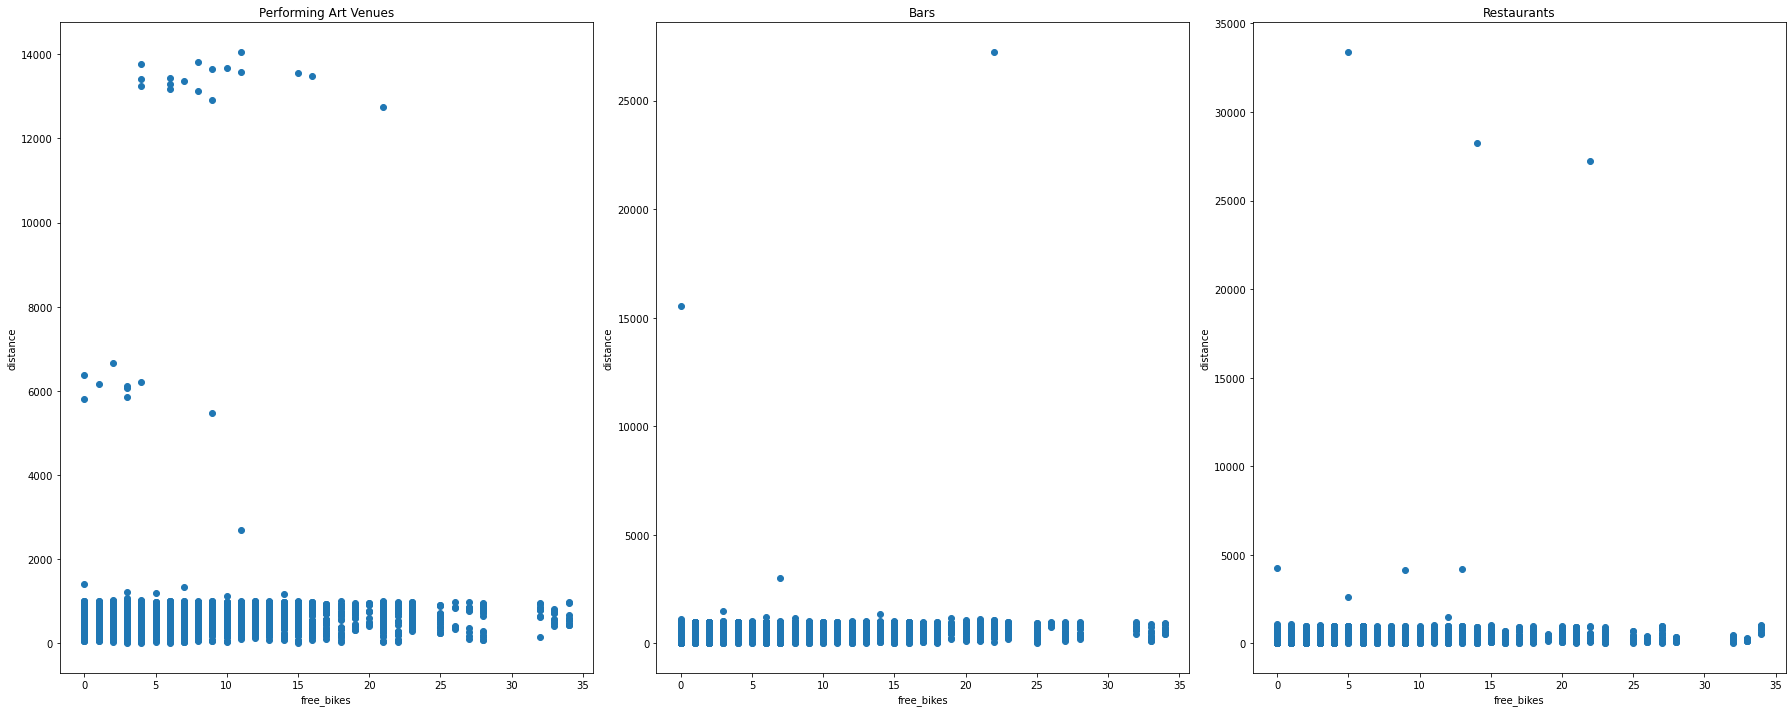

In [56]:
# Set Plot Dimensions
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Plot Performing Art Venues
axes[0].scatter(bike_stations_and_places_art_quant_df['free_bikes'], bike_stations_and_places_art_quant_df['distance'])
axes[0].set_xlabel('free_bikes')
axes[0].set_ylabel('distance')
axes[0].set_title('Performing Art Venues')

# Plot bars
axes[1].scatter(bike_stations_and_places_bar_quant_df['free_bikes'], bike_stations_and_places_bar_quant_df['distance'])
axes[1].set_xlabel('free_bikes')
axes[1].set_ylabel('distance')
axes[1].set_title('Bars')

# Plot Restaurants
axes[2].scatter(bike_stations_and_places_restaurant_quant_df['free_bikes'], bike_stations_and_places_restaurant_quant_df['distance'])
axes[2].set_xlabel('free_bikes')
axes[2].set_ylabel('distance')
axes[2].set_title('Restaurants')

# Scatterplots
plt.tight_layout()
plt.show()


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [66]:
# Input tables into SQL database
conn = sqlite3.connect(r'C:\Users\akans\Documents\Kierans_Documents\LHL\Statistical-Modelling-Project\data\statistical_modelling_project.db')
bike_stations_toronto.to_sql('bike_stations_toronto', conn, if_exists='replace', index=False)
results_four.to_sql('results_four', conn, if_exists='replace', index=False)
bike_stations_and_places_art_quant_df.to_sql('bike_stations_and_places_art_quant_df', conn, if_exists='replace', index=False)
bike_stations_and_places_bar_quant_df.to_sql('bike_stations_and_places_bar_quant_df', conn, if_exists='replace', index=False)
bike_stations_and_places_restaurant_quant_df.to_sql('bike_stations_and_places_restaurant_quant_df', conn, if_exists='replace', index=False)
cursor = conn.cursor()

c:\Users\akans\anaconda3\lib\site-packages\pandas\core\generic.py:2653: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


Look at the data before and after the join to validate your data.

In [69]:
def validate (table_name):
    query = f"SELECT * FROM '{table_name}'"
    df_from_sql = pd.read_sql_query(query, conn)

    if table_name.equals(df_from_sql):
        print(f"{table_name} and the sql {df_from_sql} are exactly the same")
    else:
        print(f"{table_name} and the sql {df_from_sql} are not the same")

# print(validate(bike_stations_toronto))
# print(validate(results_four))
print(validate(bike_stations_and_places_bar_quant_df))
print(validate(bike_stations_and_places_art_quant_df))
print(validate(bike_stations_and_places_restaurant_quant_df))


DatabaseError: Execution failed on sql 'SELECT * FROM '       free_bikes  distance
0              13       194
1              13       842
2              13       804
3              13       617
4              13       824
...           ...       ...
12752           0       630
12753           0        80
12754           0       280
12755           0       617
12756           0       518

[4936 rows x 2 columns]'': no such table:        free_bikes  distance
0              13       194
1              13       842
2              13       804
3              13       617
4              13       824
...           ...       ...
12752           0       630
12753           0        80
12754           0       280
12755           0       617
12756           0       518

[4936 rows x 2 columns]